In [2]:
import deepdoctection as dd
from pathlib import Path
import pandas as pd
import json
from matplotlib import pyplot as plt
pd.set_option('display.max_colwidth', None)

### Initialisierung

In [3]:
path = Path("/home/janis/Data/pedocs_meta_data_textract")
pedocs_jsonl = path / "pedocs.jsonl"
df = dd.SerializerJsonlines.load(pedocs_jsonl)
df.reset_state()
all_items = []
for dp in df:
    all_items.append(dp)
    
df = pd.DataFrame.from_records(all_items)
all_doc_ids = set(df['doc_id'].tolist())

### Anzeige alle Dokumente (ca. 50 wurden prozessiert)

In [4]:
all_doc_ids

{'0010d9f89dc9cae63425a21f8d2e5be9a7798182',
 '008cc72e5e8c2abee046742cdb4dcd2028f98e96',
 '00a29717bf8bbe5b347e74fd4f805ea67f426389',
 '00d99913ea6d22776b2d44bc60ab836c4debfe9b',
 '00ed2e6f4970ddc170c54c70575397cfc7fa305d',
 '010ff6089430c82c94b3802a0a99234b585235a6',
 '0137267183c91ebcd723b1f8bfac9df071663fe0',
 '01382a9e4d12ac97d52edb4a5ef4e76fbd36d080',
 '016c92a67cf8209c456973b4ed18bbd6ca198911',
 '01afdfe1253574e3c043585443a926752a39bac3',
 '01b31937f2a4a6a324f715444c0db782c16b3ceb',
 '01c77fa7d972c28a35abd39445b0f2513170c963',
 '01ca88b13c3c8eb7f1c25f6f3a1334cc543b6b2d',
 '01ef71b57d779eaf80e3ea51dc1ed7d4f8eef91b',
 '01f291e33c53be0fbbc699d5a17203c23d28bf7b',
 '0214100601202926fb959151d4a02ebfaf1b6118',
 '0226b627d2fc61f0dde8466185a8e9df980dd0ad',
 '026d20c02c70a83f1ea51439b3f2fd27c85d0382',
 '029818abf24a4eae828e4fe78a64c824b3bbe6da',
 '02cefbeb2d07fa075da188db179bf3c5209c6bbe',
 '02e1bc62df2906fd2ec915923a6c02d5db3e74f4',
 '02ff7672e8ac6eab998137d18686c5ad7547193e',
 '034215ee

### Auswahl eines Dokumentes durch Angabe der `doc_id`

In [16]:
doc_id = "02ff7672e8ac6eab998137d18686c5ad7547193e"
all_elements = df[df['doc_id']==doc_id]

### Ausgabe aller cited items im Abschnitt Literatur und nachfolgenden Textblocks

Ein Dokument kann mehrere Seiten (file_name) enthalten. Ihre Nummerierung im Dokument sind durch _k.pdf gekennzeichnet

In [17]:
all_elements

,doc_id,file_name,annotation_id,text,page_num
903,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,53a7c0c0-02af-355e-9b6a-9309f2178597,"HEIMPEL, HERMANN: Entwurf einer Deutschen Geschichte. In: Ders.: Der Mensch in seiner Gegenwart. Göttingen 1954, S. 162-195.",0
904,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,903e8199-0c98-3614-a9bb-4ea56df9c72b,"HERRLITZ, HANS-GEORG/HOPF, WULF/TITZE, HARTMUT: Deutsche Schulgeschichte von 1800 bis zur Gegenwart. Königstein 1981.",0
905,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,9f75973a-0a28-3166-bade-128a7694058c,"LOBBE, HERMANN: Was heißt: ""Das kann man nur historisch erklären""? in: KOSSELLEK, REINHART/ STEMPEL, WOLF-DIETER (Hrsg.): Geschichte Ereignis und Erzählung. (= Poetik und Hermeneu- tik, Bd. V). München 1973.",0
906,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,0da6a758-1562-3968-926d-0c116612ab23,"SCHWARZ, FRIEDRICH HEINRICH CHRISTIAN: Geschichte der Erziehung. Erziehungslehre, Bd. 4). Leipzig 1813.",0
907,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,16a73e49-2d97-385e-ae17-596d52c1da02,"PAULSEN, FRIEDRICH: Geschichte des gelehrten Unterrichts auf den deutschen Schulen und Universi- täten vom Ausgang des Mittelalters bis zur Gegenwart 1885 (Neudruck der 3. Aufl. von 1919: Berlin 1965).",0
908,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,54974567-13d1-31a4-8d79-0b90e8f3b271,"MULLER, DETLEF K.: Sozialstruktur und Schulsystem. Aspekte zum Strukturwandel des Schulwesens im 19. Jahrhundert. Göttingen 1977 (a).",0
909,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,cf6d0770-89c3-345f-a08a-601d83708ade,"HERRLITZ, HANS-GEORG/TITZE, HARTMUT: Überfüllung als bildungspolitische Strategie. Zur admi- nistrativen Steuerung der Lehrerarbeitslosigkeit in Preußen 1870-1914. In: HERMANN, ULRICH (Hrsg.): Schule und Gesellschaft im 19. Jahrhundert. Weinheim 1977, S. 348-370.",0
910,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,460cea7d-7812-376c-b20d-3152fdc35ae7,"BLANKERTZ, HERWIG: Die Geschichte der Pädagogik von der Aufklärung bis zur Gegenwart. Wetzlar 21982.",0
911,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,e9e1cc61-ae3a-384e-9ea8-9bc1cad74d72,"PAULSEN, FRIEDRICH: Das deutsche Bildungswesen in seiner geschichtlichen Entwicklung 1906 (Neudruck der 3. Aufl. von 1919: Darmstadt 1966).",0
912,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,5ebdc4c5-b58a-34a9-b939-a4dbdd3c5eb0,"GADAMER, HANS-GEORG: Wahrheit und Methode. Grundzüge einer philosophischen Hermeneutik. Tübingen 1960.",0


### Ansicht der Originalseite

Auswahl `file_name`. Die Anzeige wird auf die Textblöcke innerhalb der Seite gefiltert

In [19]:
file_name = "02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf"
path_file_name = path / file_name.replace(".pdf",".json")

with open(path_file_name, "r") as file:
    out = json.load(file)
    image = dd.Page.from_dict(**out)
    page = dd.Page.from_image(image,dd.LayoutType.word, [dd.LayoutType.text, 
                                                         dd.LayoutType.title, 
                                                         dd.LayoutType.list, 
                                                         dd.LayoutType.table, 
                                                         dd.LayoutType.figure,])

all_elements_one_page = df[df['file_name']==file_name]
all_elements_one_page

,doc_id,file_name,annotation_id,text,page_num
903,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,53a7c0c0-02af-355e-9b6a-9309f2178597,"HEIMPEL, HERMANN: Entwurf einer Deutschen Geschichte. In: Ders.: Der Mensch in seiner Gegenwart. Göttingen 1954, S. 162-195.",0
904,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,903e8199-0c98-3614-a9bb-4ea56df9c72b,"HERRLITZ, HANS-GEORG/HOPF, WULF/TITZE, HARTMUT: Deutsche Schulgeschichte von 1800 bis zur Gegenwart. Königstein 1981.",0
905,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,9f75973a-0a28-3166-bade-128a7694058c,"LOBBE, HERMANN: Was heißt: ""Das kann man nur historisch erklären""? in: KOSSELLEK, REINHART/ STEMPEL, WOLF-DIETER (Hrsg.): Geschichte Ereignis und Erzählung. (= Poetik und Hermeneu- tik, Bd. V). München 1973.",0
906,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,0da6a758-1562-3968-926d-0c116612ab23,"SCHWARZ, FRIEDRICH HEINRICH CHRISTIAN: Geschichte der Erziehung. Erziehungslehre, Bd. 4). Leipzig 1813.",0
907,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,16a73e49-2d97-385e-ae17-596d52c1da02,"PAULSEN, FRIEDRICH: Geschichte des gelehrten Unterrichts auf den deutschen Schulen und Universi- täten vom Ausgang des Mittelalters bis zur Gegenwart 1885 (Neudruck der 3. Aufl. von 1919: Berlin 1965).",0
908,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,54974567-13d1-31a4-8d79-0b90e8f3b271,"MULLER, DETLEF K.: Sozialstruktur und Schulsystem. Aspekte zum Strukturwandel des Schulwesens im 19. Jahrhundert. Göttingen 1977 (a).",0
909,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,cf6d0770-89c3-345f-a08a-601d83708ade,"HERRLITZ, HANS-GEORG/TITZE, HARTMUT: Überfüllung als bildungspolitische Strategie. Zur admi- nistrativen Steuerung der Lehrerarbeitslosigkeit in Preußen 1870-1914. In: HERMANN, ULRICH (Hrsg.): Schule und Gesellschaft im 19. Jahrhundert. Weinheim 1977, S. 348-370.",0
910,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,460cea7d-7812-376c-b20d-3152fdc35ae7,"BLANKERTZ, HERWIG: Die Geschichte der Pädagogik von der Aufklärung bis zur Gegenwart. Wetzlar 21982.",0
911,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,e9e1cc61-ae3a-384e-9ea8-9bc1cad74d72,"PAULSEN, FRIEDRICH: Das deutsche Bildungswesen in seiner geschichtlichen Entwicklung 1906 (Neudruck der 3. Aufl. von 1919: Darmstadt 1966).",0
912,02ff7672e8ac6eab998137d18686c5ad7547193e,02ff7672e8ac6eab998137d18686c5ad7547193e_0.pdf,5ebdc4c5-b58a-34a9-b939-a4dbdd3c5eb0,"GADAMER, HANS-GEORG: Wahrheit und Methode. Grundzüge einer philosophischen Hermeneutik. Tübingen 1960.",0


### Ansicht `file_name`

Setzen von show_layouts=True zeigt die Textblöcke an, die im Feld text angezeigt werden. 

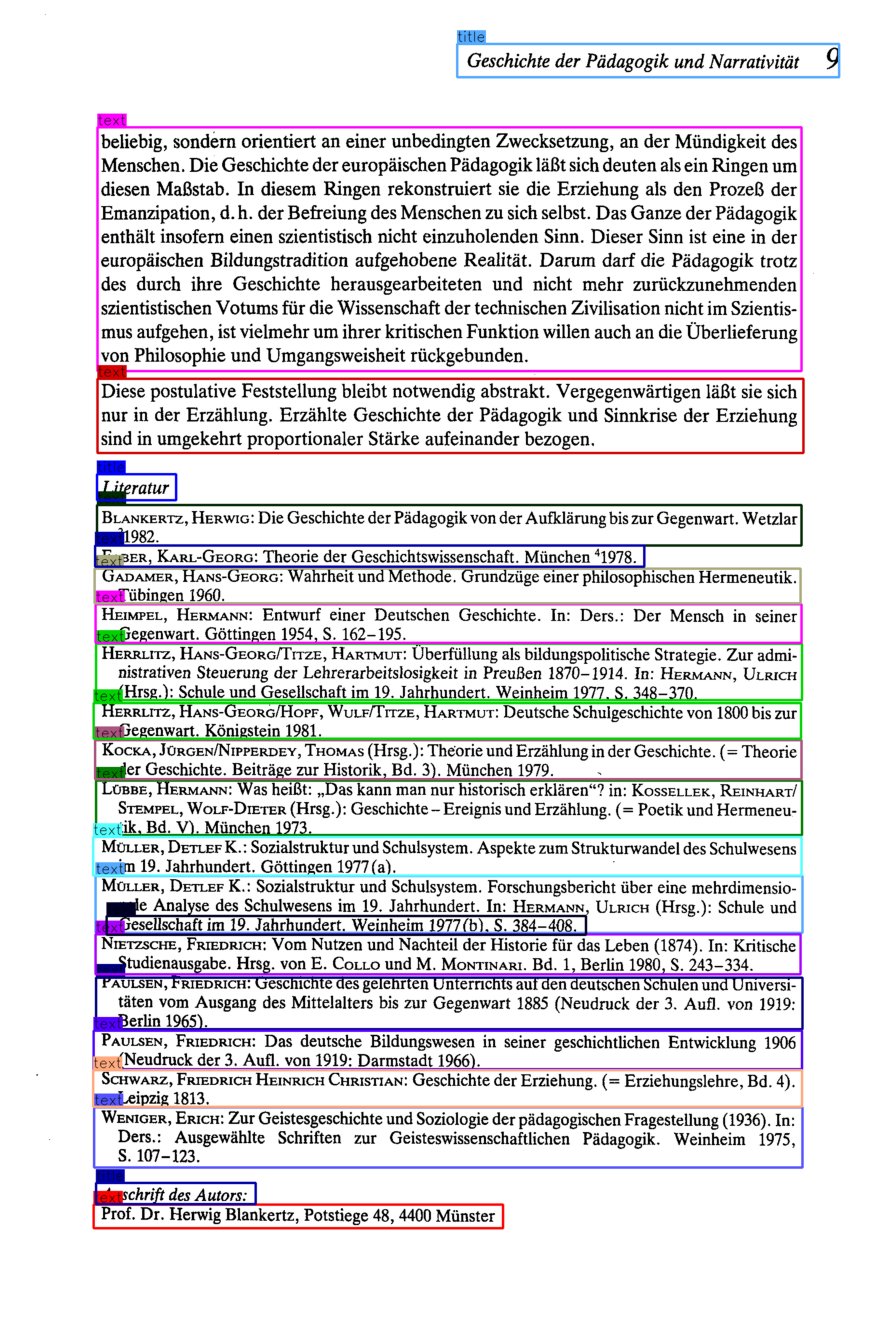

In [20]:
image = page.viz(interactive=False, show_layouts=True)
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)